_____________MOVIE REVIEW AND ANALYSIS___________________
ENTER THE MOVIE:dil_bechara
************TITLE:************
 Dil Bechara



************ABOUT:************
 Kizie and Manny, two ordinary people brought together by a tragic twist, embark on a bittersweet and extraordinary journey into the heart of that crazy little thing called 'life'.



************RELEASED_ON:************
 
                            101 minutes
                        
image not found



************CAST:************
Sushant Singh Rajput
Sanjana Sanghi
Sahil Vaid
Saif Ali Khan



************CRITICS____REVIEWS************
review [1]
The film independently works well to provide humour, poignancy, and catchy music, but much of your enjoyment will depend on if you cared for John Green's story the first time around.


review [2]
Sushant's final on-screen appearance shines because of him and not much else. On the whole, an average watch and certainly not comparable to the original.


review [3]
This short (at le

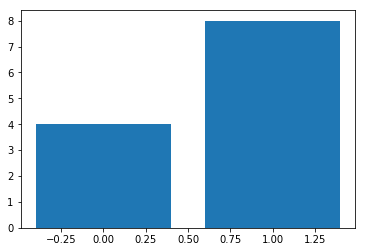

In [4]:
## program to predict target of a review

import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from extracting import *

le = LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

ps = PorterStemmer()
rg = RegexpTokenizer(r'\w+')
sw = set(stopwords.words('english'))

## reading the csv file
data = pd.read_csv("C:/Users//sahil/Desktop/PC/movie_review/train/train.csv")
#print(data.shape)
## tranfroming dataset into numpy
dataset = data.values
## separating reviews and target
reviews = dataset[:, 0]
y = dataset[:, 1]
Y = le.fit_transform(y)  ## transfroming targe into labels

##dividing the data into train and testing

x_train, x_test, y_train, y_test = train_test_split(reviews, Y, random_state=1, test_size=0.9)


## function to get bag of words
## tokenize
## stopword
## stemming
## countervectorization

def list(text):  # converting review array into list
    a = []
    for i in range(len(text)):
        a.append(text[i])
    return a


def stopword(text, sw):
    useful_words = [w for w in text if w not in sw]
    stem = [ps.stem(text) for text in useful_words]
    return stem


def token(a):
    token = []
    for i in range(len(a)):
        a[i] = a[i].lower()
        word = rg.tokenize(a[i])
        stop = stopword(word, sw)

        cleaned = ' '.join(stop)
        token.append(cleaned)
    return token

## function to conert specific review into bag of words
def test_tokenize(x,sw):
    final=[]
    text = rg.tokenize(x)
    useful_words = [w for w in text if w not in sw]
    stem = [ps.stem(text) for text in useful_words]
    cleaned = ' '.join(stem)
    final.append(cleaned)


    return final

def train_test(x_train,test):
    ##training ourr machine
    train = list(x_train)
    trained_data = token(train)
    #print(len(trained_data))
    #preparing sample for testing
    #test = x_test[1000]
    #print(test)
    tested = test_tokenize(test, sw)
    #print(tested)

    ##COUNTVECTORIZING
    z = cv.fit_transform(trained_data).toarray()
    #print(z)
    #feat = cv.get_feature_names()

    ## fitting traning data
    nv = MultinomialNB()
    nv.fit(z, y_train)

    final = cv.transform(tested).toarray()
    pred = nv.predict(final)
    return pred
    #print(y_test[1000])
print("_____________MOVIE REVIEW AND ANALYSIS___________________")
movie_ = input("""ENTER THE MOVIE:""")
extract(movie_)
reviews_list = rev(movie_)
r = []
for i in range(len(reviews_list)):
    predict = train_test(x_train,reviews_list[i])
    
    r.append(predict[0])


array = np.array(r)
new_array = (np.unique(array,return_counts=True))


percentage_good = new_array[1][1]/np.sum(new_array[1])
print("OUR PERCENTAGE METRE =",percentage_good*100)


index = np.argmax(new_array[1])
dec = new_array[0][index]


if dec == 1 :
    print("good movie")
else:
    print("badmovie")

plt.bar(new_array[0],new_array[1])
plt.show()